In [5]:
##Import Libraries


#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf #collection of machine learning algorithms
print("tensorflow version: {}". format(tf.__version__))

import keras  #collection of machine learning algorithms
print("keras version: {}". format(keras.__version__))



#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["dir", "input",],shell=True).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.14.0
scikit-learn version: 0.23.1
tensorflow version: 2.2.0
keras version: 2.4.2
-------------------------
 Volume in drive C has no label.
 Volume Serial Number is 9E12-1BF2

 Directory of C:\Users\Odin\PycharmProjects\Machine-Learning-HWs\HW03\input

06/14/2020  12:22 PM    <DIR>          .
06/14/2020  12:22 PM    <DIR>          ..
12/11/2019  03:17 AM             3,258 gender_submission.csv
12/11/2019  03:17 AM            28,629 test.csv
12/11/2019  03:17 AM            61,194 train.csv
               3 File(s)         93,081 bytes
               2 Dir(s)  19,517,874,176 bytes free



In [ ]:
#Common Model Algorithms
from sklearn import svm, tree,cluster, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process ,decomposition

from xgboost import XGBClassifier
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense ,Dropout    # create layers 
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold , cross_val_score
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
# sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

seed = 7

In [7]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('input/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('input/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info())
#data_raw.head()
#data_raw.tail() 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass                              Name     Sex  \
385          386         0       2         Davies, Mr. Charles Henry    male   
595          596         0       3       Van Impe, Mr. Jean Baptiste    male   
294          295         0       3                  Mineff, Mr. Ivan    male   
675          676         0       3    Edvardsson, Mr. Gustaf Hjalmar    male   
812          813         0       2         Slemen, Mr. Richard James    male   
876          877         0       3     Gustafsson, Mr. Alfred Ossian    male   
697          698         1       3  Mullens, Miss. Katherine "Katie"  female   
197          198         0       3  Olsen, Mr. Karl Siegwart Andreas    male   
237          238         1       2  Collyer, Miss. Marjorie "Lottie"  female   
207          208         1       3       Albimona, Mr. Nassef Cassem    male   

      Age  SibSp  Parch        Ticket     Fare Cabin Embarked  
385  18.0      0      0  S.O.C. 14879  73.5000   NaN        S  
595  36.0      1      1        345773  24.1500   NaN        S  
294  24.0      0      0        349233   7.8958   NaN        S  
675  18.0      0      0        349912   7.7750   NaN        S  
812  35.0      0      0         28206  10.5000   NaN        S  
876  20.0      0      0          7534   9.8458   NaN        S  
697   NaN      0      0         35852   7.7333   NaN        Q  
197  42.0      0      1          4579   8.4042   NaN        S  
237   8.0      0      2    C.A. 31921  26.2500   NaN        S  
207  26.0      0      0          2699  18.7875   NaN        C

# Data Cleansing: ## Correcting
## Completing
## Creating
## Converting


In [8]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


PassengerId    Survived      Pclass                Name   Sex  \
count    891.000000  891.000000  891.000000                 891   891   
unique          NaN         NaN         NaN                 891     2   
top             NaN         NaN         NaN  Karun, Miss. Manca  male   
freq            NaN         NaN         NaN                   1   577   
mean     446.000000    0.383838    2.308642                 NaN   NaN   
std      257.353842    0.486592    0.836071                 NaN   NaN   
min        1.000000    0.000000    1.000000                 NaN   NaN   
25%      223.500000    0.000000    2.000000                 NaN   NaN   
50%      446.000000    0.000000    3.000000                 NaN   NaN   
75%      668.500000    1.000000    3.000000                 NaN   NaN   
max      891.000000    1.000000    3.000000                 NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000      204   
unique         NaN         NaN         NaN    681         NaN      147   
top            NaN         NaN         NaN   1601         NaN  B96 B98   
freq           NaN         NaN         NaN      7         NaN        4   
mean     29.699118    0.523008    0.381594    NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [9]:
for dataset in data_cleaner:    
    #complete missing age with median
#     dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [10]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
#     dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    

stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         714 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data colum

Survived  Pclass                                               Name  \
826         0       3                                       Lam, Mr. Len   
856         1       1         Wick, Mrs. George Dennick (Mary Hitchcock)   
854         0       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)   
676         0       3                      Sawyer, Mr. Frederick Charles   
267         1       3                           Persson, Mr. Ernst Ulrik   
72          0       2                               Hood, Mr. Ambrose Jr   
657         0       3                      Bourke, Mrs. John (Catherine)   
851         0       3                                Svensson, Mr. Johan   
558         1       1             Taussig, Mrs. Emil (Tillie Mandelbaum)   
41          0       2  Turpin, Mrs. William John Robert (Dorothy Ann ...   

        Sex   Age  SibSp  Parch      Fare Embarked  FamilySize  IsAlone Title  \
826    male   NaN      0      0   56.4958        S           1        1    Mr   
856  female  45.0      1      1  164.8667        S           3        0   Mrs   
854  female  44.0      1      0   26.0000        S           2        0   Mrs   
676    male  24.5      0      0    8.0500        S           1        1    Mr   
267    male  25.0      1      0    7.7750        S           2        0    Mr   
72     male  21.0      0      0   73.5000        S           1        1    Mr   
657  female  32.0      1      1   15.5000        Q           3        0   Mrs   
851    male  74.0      0      0    7.7750        S           1        1    Mr   
558  female  39.0      1      1   79.6500        S           3        0   Mrs   
41   female  27.0      1      0   21.0000        S           2        0   Mrs   

             FareBin  
826  (31.0, 512.329]  
856  (31.0, 512.329]  
854   (14.454, 31.0]  
676   (7.91, 14.454]  
267   (-0.001, 7.91]  
72   (31.0, 512.329]  
657   (14.454, 31.0]  
851   (-0.001, 7.91]  
558  (31.0, 512.329]  
41    (14.454, 31.0]

In [11]:
# notice that instead of using Title, we should use its corresponding dummy variables 
label = LabelEncoder()
for dataset in data_cleaner:
    df_sub1 = dataset[['Age','Pclass','Sex','SibSp','FareBin','Title','IsAlone','FamilySize','Embarked']]
    for col in ['Sex','Title','FareBin','Embarked'] :
        df_sub1[col] = label.fit_transform(df_sub1[col])

    df_sub1.head()

    X_train  = df_sub1.dropna().drop('Age', axis=1)
    y_train  = dataset['Age'].dropna()
    X_test = df_sub1.loc[np.isnan(dataset.Age)].drop('Age', axis=1)

    regressor = RandomForestRegressor(n_estimators = 300)
    regressor.fit(X_train, y_train)
    y_pred = np.round(regressor.predict(X_test),1)
    dataset.Age.loc[dataset.Age.isnull()] = y_pred

    dataset.Age.isnull().sum(axis=0) # no more NAN now


In [12]:
for dataset in data_cleaner:    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [13]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



Pclass  SibSp  Parch   Age     Fare  FamilySize  IsAlone  Sex_female  \
0       3      1      0  22.0   7.2500           2        0           0   
1       1      1      0  38.0  71.2833           2        0           1   
2       3      0      0  26.0   7.9250           1        1           1   
3       1      1      0  35.0  53.1000           2        0           1   
4       3      0      0  35.0   8.0500           1        1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Master  Title_Misc  \
0         1           0           0           1             0           0   
1         0           1           0           0             0           0   
2         0           0           0           1             0           0   
3         0           0           0           1             0           0   
4         1           0           0           1             0           0   

   Title_Miss  Title_Mr  Title_Mrs  
0           0         1          0  
1           0         0          1  
2           1         0          0  
3           0         0          1  
4           0         1          0

In [14]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

PassengerId    Survived      Pclass                Name   Sex  \
count    891.000000  891.000000  891.000000                 891   891   
unique          NaN         NaN         NaN                 891     2   
top             NaN         NaN         NaN  Karun, Miss. Manca  male   
freq            NaN         NaN         NaN                   1   577   
mean     446.000000    0.383838    2.308642                 NaN   NaN   
std      257.353842    0.486592    0.836071                 NaN   NaN   
min        1.000000    0.000000    1.000000                 NaN   NaN   
25%      223.500000    0.000000    2.000000                 NaN   NaN   
50%      446.000000    0.000000    3.000000                 NaN   NaN   
75%      668.500000    1.000000    3.000000                 NaN   NaN   
max      891.000000    1.000000    3.000000                 NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000      204   
unique         NaN         NaN         NaN    681         NaN      147   
top            NaN         NaN         NaN   1601         NaN  B96 B98   
freq           NaN         NaN         NaN      7         NaN        4   
mean     29.699118    0.523008    0.381594    NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [15]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


Sex_Code  Pclass  Embarked_Code  Title_Code  FamilySize  AgeBin_Code  \
105         1       3              2           3           1            1   
68          0       3              2           2           7            1   
253         1       3              2           3           2            1   
320         1       3              2           3           1            1   
706         0       2              2           4           1            2   

     FareBin_Code  
105             0  
68              1  
253             2  
320             0  
706             1

In [ ]:
train1_x.head()

In [ ]:
train1_x_dummy.head()

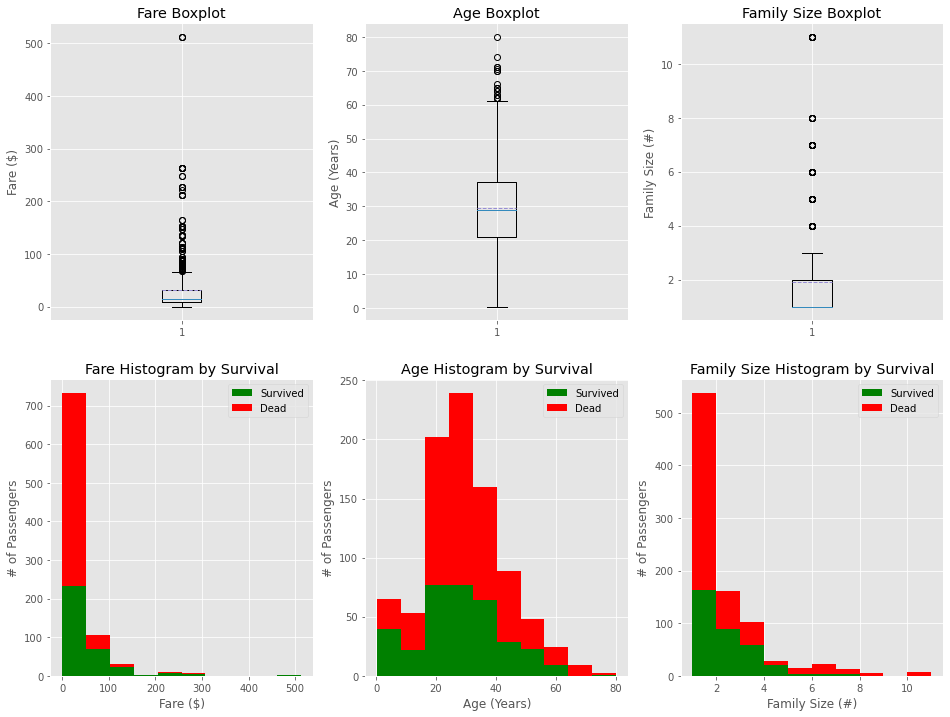

In [16]:
#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

In [17]:
def _get_nn_model():

#     classifier = Sequential()
#     classifier.add(Dense(activation="relu", input_dim=7, units=11, kernel_initializer="uniform"))
#     classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
#     classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
#     classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
    model = Sequential()
    model.add(Dense(activation="relu", input_dim=17, units=11, kernel_initializer="uniform"))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
#     model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    return model

In [18]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # i. Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    ensemble.BaggingClassifier(),
    ensemble.AdaBoostClassifier( tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)),
    
    
    # ii. SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # iii. Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
     XGBClassifier()   
#         # v. PCA 
#     cluster.KMeans(n_clusters=2),
#     # iv. Neutal Nets 
#     _get_nn_model() 

    
    
    
    
    ]

In [19]:
data1[Target]


Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [20]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = data1[Target]
MLA_predict_test =  pd.DataFrame()
#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    
#     #set name and parameters
    MLA_name = alg.__class__.__name__
#     print(MLA_name)
#     if MLA_name == 'Sequential':
#         MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
# #         MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
 
# #         model = KerasClassifier(build_fn=_get_nn_model, epochs=100, batch_size=10)
# #         kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# #         cv_results = model_selection.cross_validate(model, data1[data1_x_bin], data1[Target], cv=kfold,return_train_score=True)
# # #         cv_results = model_selection.cross_validate(model , data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
# #         MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
# #         MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
# #         MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
               
#         history = alg.fit(data1[data1_x_bin], data1[Target], batch_size = 10, epochs = 300,validation_split=0.1,verbose = 1,shuffle=True)
#         MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
#         print(alg.predict_classes(data_val[data1_x_bin] ))
#         df = alg.predict_classes(data_val[data1_x_bin] )
#         row_index+=1
#         #         MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
# #         MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
# #         MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
#         continue
   
 
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    

#     #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    row_index+=1

    

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare



MLA Name                                     MLA Parameters  \
0  RandomForestClassifier  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   
4                   NuSVC  {'break_ties': False, 'cache_size': 200, 'clas...   
3                     SVC  {'C': 1.0, 'break_ties': False, 'cache_size': ...   
7           XGBClassifier  {'objective': 'binary:logistic', 'base_score':...   
1       BaggingClassifier  {'base_estimator': None, 'bootstrap': True, 'b...   
2      AdaBoostClassifier  {'algorithm': 'SAMME.R', 'base_estimator__ccp_...   
6    KNeighborsClassifier  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
5               LinearSVC  {'C': 1.0, 'class_weight': None, 'dual': True,...   

  MLA Train Accuracy Mean MLA Test Accuracy Mean    MLA Time  
0                0.893071               0.828358    0.121573  
4                0.834644               0.826866   0.0294275  
3                0.835581               0.826493   0.0258159  
7                 0.88839               0.826493   0.0282238  
1                0.890075               0.820149   0.0175043  
2                0.893071                0.81306    0.060138  
6                0.847004               0.804104  0.00379219  
5                0.801124               0.796269   0.0157592

In [20]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
# train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
# train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
# train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)
train1_x_dummy.shape

(668, 17)

In [27]:
MLA_compare.iloc[0,1]

"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"

In [19]:
model = Sequential()
model.add(Dense(activation="relu", input_dim=17, units=11, kernel_initializer="uniform"))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])


In [20]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:




model.fit(train1_x_dummy, train1_y_dummy, batch_size = 10, epochs = 100,validation_split=0.1,verbose = 1,shuffle=True
#           ,callbacks=[tensorboard_callback]
         )
# y_pred=model.predict_classes(test1_x_dummy)


Epoch 1/100
61/61 [==============================] - 0s 7ms/step - loss: 0.4551 - accuracy: 0.7987 - val_loss: 0.5894 - val_accuracy: 0.7313
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7903 - val_loss: 0.5407 - val_accuracy: 0.7910
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.8120 - val_loss: 0.4823 - val_accuracy: 0.7910
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8053 - val_loss: 0.4999 - val_accuracy: 0.7910
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8020 - val_loss: 0.4777 - val_accuracy: 0.8209
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8186 - val_loss: 0.4697 - val_accuracy: 0.8060
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8103 - val_loss: 0.4703 - val_accuracy: 0.8060
Epoch 8/100
6

In [25]:
y_pred=(model.predict(test1_x_dummy) > 0.5).astype("int32")
print(metrics.accuracy_score(test1_y_dummy, y_pred))

0.8116591928251121


In [26]:
results = model.evaluate(test1_x_dummy, test1_y_dummy, batch_size=10)

23/23 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8117


In [213]:
#optimization



#RandomForestClassifier

MLA[0]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gridF = model_selection.GridSearchCV(MLA[0], random_grid, cv = 3, verbose = 1, 
                      n_jobs = 2)

bestF = gridF.fit(train1_x, train1_y)
y_pred=bestF.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))



Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s


KeyboardInterrupt: 

In [229]:
MLA[0]= bestF 

In [230]:
bestF.best_params_

{'bootstrap': True,
 'max_depth': 45,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [204]:
MLA[1]


BaggingClassifier()

In [27]:
#BaggingClassifier
MLA[1]

param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

gridF = model_selection.GridSearchCV(ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)

bestB = gridF.fit(train1_x, train1_y)
y_pred=bestB.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))



0.8116591928251121


In [233]:
MLA[1] = bestB
bestB.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [214]:
# AdaBoostClassifier
MLA[2]
# param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
# #               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [1, 2]
#              }

# gridF = model_selection.GridSearchCV(MLA[2], param_grid, cv = 3, verbose = 1, 
#                       n_jobs = -1)

# bestADA = gridF.fit(train1_x, train1_y)
# y_pred=bestADA.predict(test1_x)
# print(metrics.accuracy_score(test1_y, y_pred))

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100,200,250,300]
             }


DTC = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = ensemble.AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = model_selection.GridSearchCV(MLA[2], param_grid=param_grid, scoring = 'roc_auc')
bestADA = grid_search_ABC.fit(train1_x, train1_y)
y_pred=bestADA.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))


0.8026905829596412


In [234]:
MLA[2] = bestADA
bestADA.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'random',
 'n_estimators': 100}

In [217]:
# SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}


grid_search_SVC =  model_selection.GridSearchCV(
        MLA[3] , param_grid)
bestSVC = grid_search_SVC.fit(train1_x, train1_y)  
y_pred=bestADA.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))

0.8026905829596412


In [235]:
MLA[3] = bestSVC
bestSVC.best_params_

{'C': 10, 'gamma': 0.01}

In [221]:
# NuSVC
MLA[4]

# LinearSVC
MLA[5]

# KNeighborsClassifier
MLA[6]
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
param_grid_knn = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors, 'p':p}
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[6] , param_grid_knn)
bestKNN = grid_search_SVC.fit(train1_x, train1_y)  
y_pred=bestKNN.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))

0.757847533632287


In [236]:
MLA[6] = bestKNN 
bestKNN.best_params_

{'leaf_size': 2, 'n_neighbors': 17, 'p': 1}

In [30]:
MLA[7]

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[7] , params)
bestXGB = grid_search_SVC.fit(train1_x, train1_y)  
y_pred=bestXGB.predict(test1_x)
print(metrics.accuracy_score(test1_y, y_pred))


0.8295964125560538


In [31]:
MLA[7] = bestXGB 
bestXGB.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [159]:
history.history

{'loss': [0.6783916354179382,
  0.6289079785346985,
  0.5586045384407043,
  0.4880298376083374,
  0.4669020175933838,
  0.46355459094047546,
  0.44893765449523926,
  0.4438673257827759,
  0.43639612197875977,
  0.43823349475860596,
  0.44126901030540466,
  0.43248435854911804,
  0.43092766404151917,
  0.42577439546585083,
  0.4297657608985901,
  0.42571839690208435,
  0.42931675910949707,
  0.4257147014141083,
  0.41875341534614563,
  0.42348384857177734,
  0.4252137839794159,
  0.42013704776763916,
  0.4240877330303192,
  0.4144645631313324,
  0.414436399936676,
  0.4131908118724823,
  0.41264140605926514,
  0.4119069278240204,
  0.4168799817562103,
  0.41719117760658264,
  0.409798264503479,
  0.40736234188079834,
  0.4125697612762451,
  0.4201909005641937,
  0.40546178817749023,
  0.40878114104270935,
  0.41132852435112,
  0.4054712951183319,
  0.4076751470565796,
  0.4073229432106018,
  0.4081881046295166,
  0.4099882245063782,
  0.4027503430843353,
  0.4004053771495819,
  0.401856

NameError: name 'MLA' is not defined

In [138]:
result = pd.DataFrame()
result['PassengerId'] = data_val['PassengerId']
result['Survived'] = df
result.to_csv('nn' +".csv",index=False)




In [127]:
result

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')